# Stack 3 Exam
The goal of this project is to demonstrate skills in Unsupervised Learning by reporting the optimal number of clusters of students.

## Import Libraries

In [234]:
# Import libraries and mount drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Cleaning and Light Data Exploration

### Data Cleaning

In [235]:
# Load the dataframe
student1 = pd.read_csv('/content/drive/MyDrive/Stack 3 Exam/Option_B_clustering - Option_B_clustering.csv')
student1.head()

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,assess_score_3,assess_score_4,assess_score_5
0,1,2,9,2,0,240,0,1,78,85,80,85,82
1,0,2,2,1,0,60,0,1,70,68,70,64,60
2,0,3,5,1,0,60,0,1,72,71,74,88,75
3,0,1,5,0,0,60,0,1,69,30,63,35,75
4,1,2,3,0,0,60,0,1,70,65,62,75,68


In [236]:
# Check the information of the dataframe
student1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12737 entries, 0 to 12736
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   gender                12737 non-null  int64
 1   highest_education     12737 non-null  int64
 2   imd_band              12737 non-null  int64
 3   age_band              12737 non-null  int64
 4   num_of_prev_attempts  12737 non-null  int64
 5   studied_credits       12737 non-null  int64
 6   disability            12737 non-null  int64
 7   passed_course         12737 non-null  int64
 8   assess_score_1        12737 non-null  int64
 9   assess_score_2        12737 non-null  int64
 10  assess_score_3        12737 non-null  int64
 11  assess_score_4        12737 non-null  int64
 12  assess_score_5        12737 non-null  int64
dtypes: int64(13)
memory usage: 1.3 MB


There are no missing or null values. Now let us check the value counts for each columns

In [237]:
# Check the value counts
for item in student1.columns:
  print(student1[item].value_counts())

0    7048
1    5689
Name: gender, dtype: int64
3    5918
1    4741
2    1898
0      98
4      82
Name: highest_education, dtype: int64
3    1486
2    1338
5    1317
1    1300
4    1286
7    1261
6    1247
0    1185
8    1183
9    1134
Name: imd_band, dtype: int64
0    8512
1    4130
2      95
Name: age_band, dtype: int64
0    11641
1      886
2      165
3       33
4        8
5        3
6        1
Name: num_of_prev_attempts, dtype: int64
60     6819
120    2251
30     1836
90     1044
180     240
150     226
75       57
240      43
70       41
210      34
45       15
100      15
270      14
80       13
135      12
130      12
300       8
40        7
160       6
110       5
105       5
165       4
195       4
170       3
140       3
250       2
220       2
200       2
145       2
190       2
85        1
155       1
360       1
325       1
280       1
95        1
630       1
235       1
330       1
430       1
Name: studied_credits, dtype: int64
0    11567
1     1170
Name: disability, dty

### Light Data Exploration

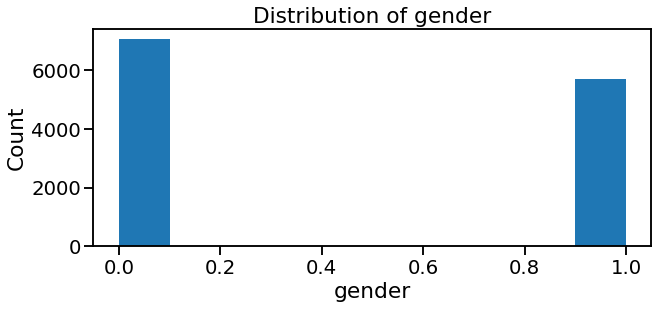

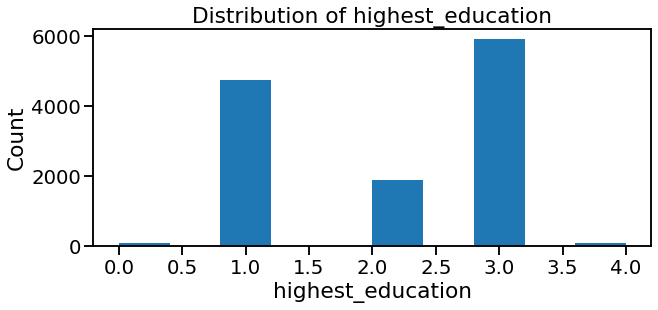

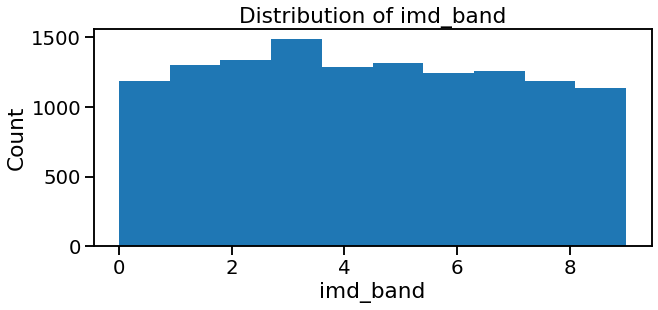

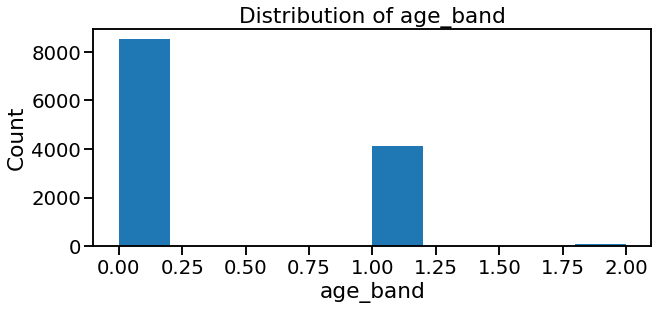

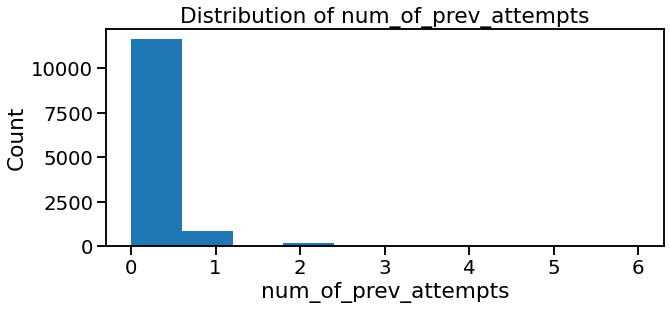

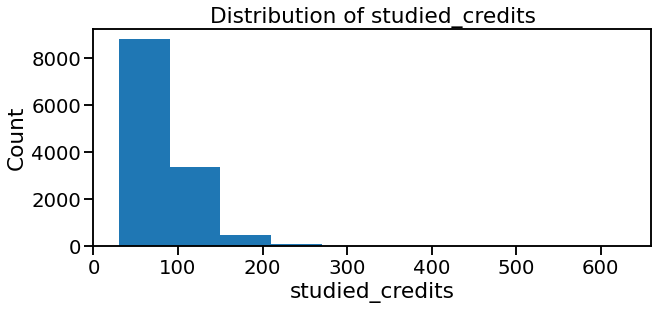

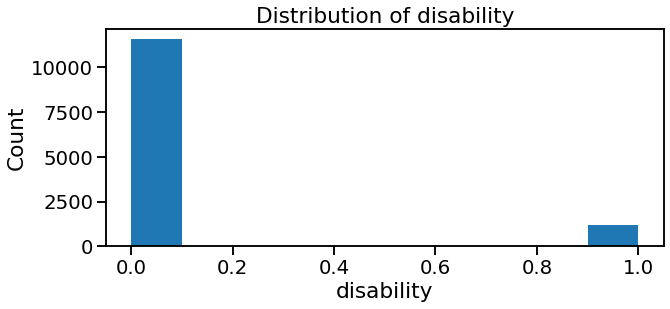

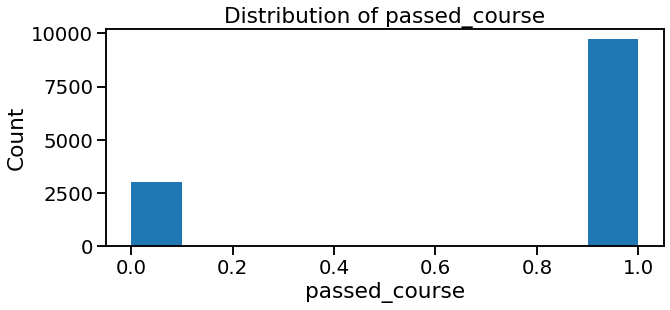

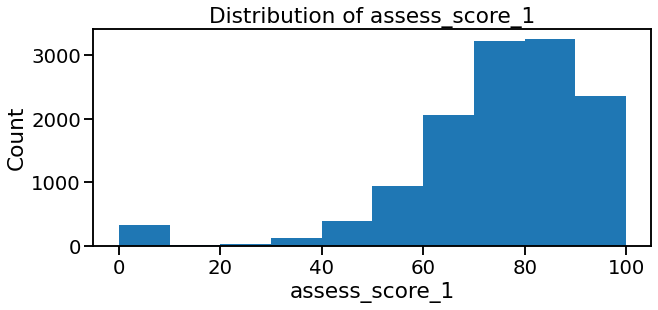

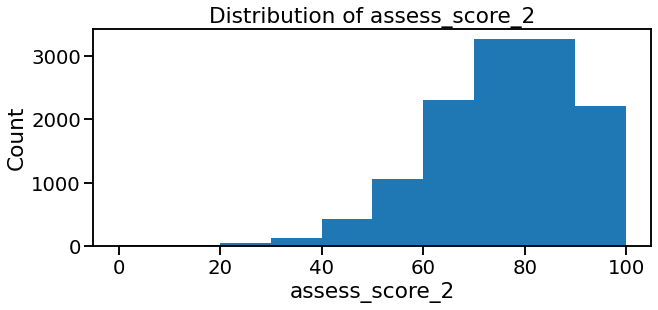

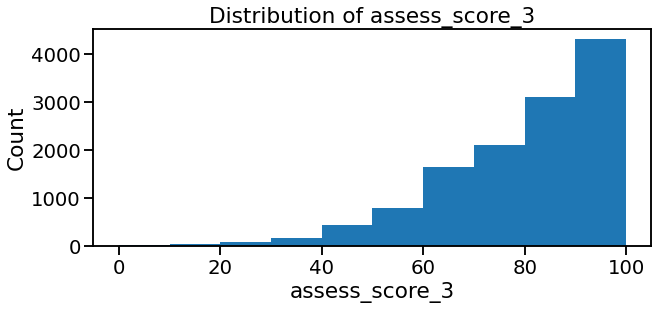

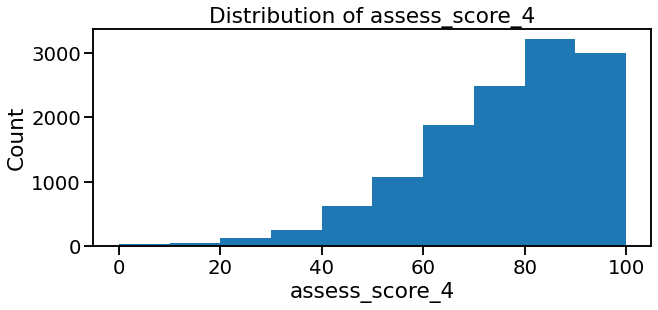

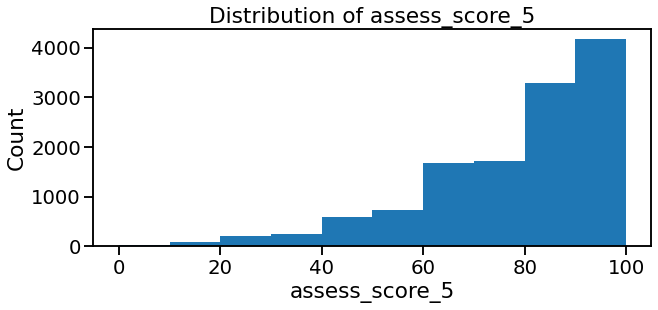

In [238]:
# Distribution of all numeric variables:
for column in student1.columns:
  sns.set_context('talk', font_scale=1.2)
  plt.figure(figsize=(10,4))
  plt.hist(student1[column])
  plt.xlabel(column)
  plt.ylabel('Count')
  plt.title(f"Distribution of {column}")
  plt.show()

Observations:
1. There are almost the same counts for the male and female
2. Count for 0 and 4 highest education is very low compared to 1, 2, and 3
3. The IMD Band is evenly distributed. We can check of there are any outliers here.
4. There are less counts with age band of 1 than 0
5. The distribution of num_of_prev_attempts is not even with bias to 0
6. Distribution for studied_credits is slightly unbalanced
7. There are very little count or entries of students with disabilities
8. Assess scores are skewed to the left

Based on the observations, we can ask the following questions:

1. What is the relationship of gender with IMD band based on age band?
2. What are the factors attributing to high count of IMD band of 3?
3. What features are attributed to IMD band of 0-4? 5-9?
4. What is the general IMD bands of entries with num_of_prev_attempts of 2?
5. What factors are attributed to high count of studied_credits less than 100?
6. What are the IMD bands for people with disabilities?
7. What are the IMD bands of people with high passed course?
8. What are the IMD bands of people with assess_score of less than 20?

## Exploratory Data Analysis

In [239]:
# Pivot table for IMD band values based on highest education
student1_highest_education = pd.pivot_table(data=student1, values='imd_band', index=['highest_education'], aggfunc='mean')
student1_highest_education

,imd_band
highest_education,
0,2.377551
1,4.112634
2,4.952582
3,4.470429
4,6.768293


No handles with labels found to put in legend.


Text(0.5, 1.0, 'Relationship of Highest Education and IMD Bands')

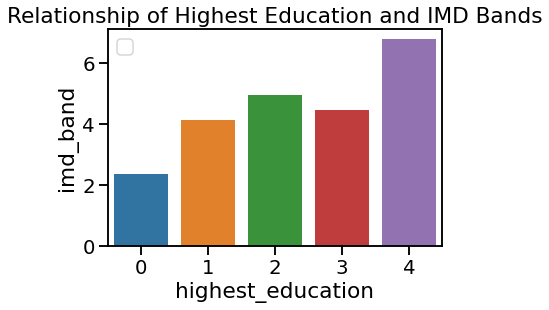

In [240]:
# Plot from the pivot table
sns.barplot(x=student1_highest_education.index, y=student1_highest_education['imd_band'])
plt.legend()
plt.title("Relationship of Highest Education and IMD Bands")

The highest educational attainment of the student is slightly correlated with the IMD band in such a way that as the educational attainment increases, the IMD band also increases. However, there is no significant increase in the IMD bands of students with highest educational attainment of 1 to 3. The significant increase in average IMD band happens when the student achieves highest educational attainment of 4.

In [241]:
# Pivot table for IMD bands values based on age band
student1_age = pd.pivot_table(data=student1, values='imd_band', index=['age_band'], aggfunc='mean')
student1_age

,imd_band
age_band,
0,4.274084
1,4.623002
2,7.031579


No handles with labels found to put in legend.


Text(0.5, 1.0, 'Relationship of Age Band and IMD Band')

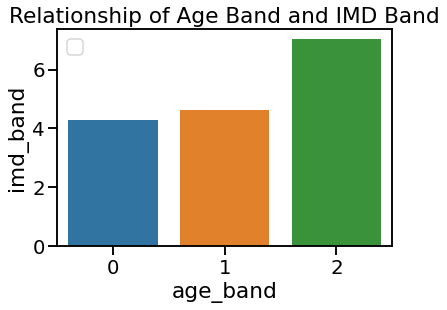

In [242]:
# Plot from the pivot table
sns.barplot(x=student1_age.index, y=student1_age['imd_band'])
plt.legend()
plt.title("Relationship of Age Band and IMD Band")

Fro the age band of 0 to 1, there are is no significant increase in the IMD band.

In [243]:
# Pivot table for IMD bands values based on num_of_prev_attempts
student1_attempt = pd.pivot_table(data=student1, values='imd_band', index=['num_of_prev_attempts'], aggfunc='mean')
student1_attempt

,imd_band
num_of_prev_attempts,
0,4.433296
1,4.218962
2,3.915152
3,3.000000
4,4.625000
5,2.333333
6,7.000000


No handles with labels found to put in legend.


Text(0.5, 1.0, 'Relationship of Number of Previous Attempts with IMD Bands')

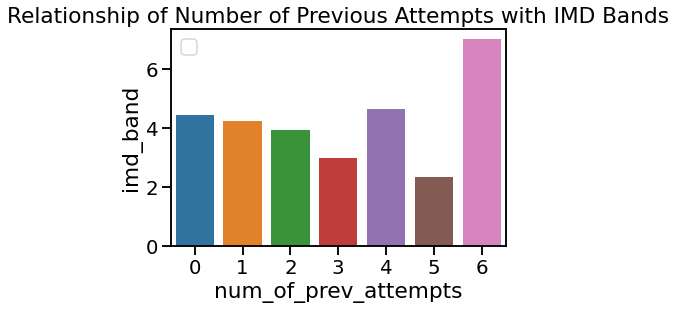

In [244]:
# Plot from the pivot table
sns.barplot(x=student1_attempt.index, y=student1_attempt['imd_band'])
plt.legend()
plt.title('Relationship of Number of Previous Attempts with IMD Bands')

There is a notieacble decrease in the average IMD bands of students with number of previous attempts from 0 to 3. While  the average IMD bands of students with number of previous attempts of 4 doest not follow the patttern. It is also interesting to note that the students with number of previous attemmpts of 6 has average IMD bands of more than 6.

In [245]:
# Pivot table for IMD bands values based on passed_course
student1_passed_course = pd.pivot_table(data=student1, values='imd_band', index=['passed_course'], aggfunc='mean')
student1_passed_course

,imd_band
passed_course,
0,4.022207
1,4.527469


No handles with labels found to put in legend.


Text(0.5, 1.0, 'Relationship of Number of Passed Course with IMD Bands')

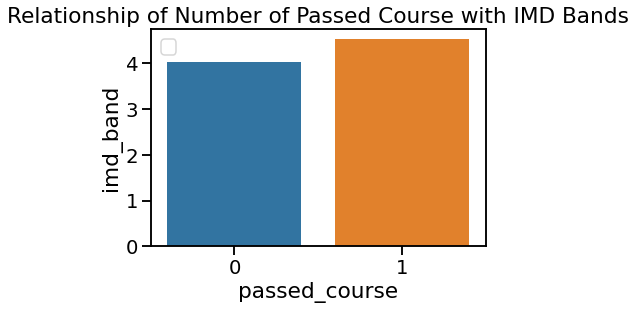

In [246]:
# Plot from the pivot table
sns.barplot(x=student1_passed_course.index, y=student1_passed_course['imd_band'])
plt.legend()
plt.title('Relationship of Number of Passed Course with IMD Bands')

Here the number of passed courses seemingly has no effect on the average IMD bands. The average IMD bands only increased slightly.

In [247]:
# Pivot table for studied_credits values based on IMD bands
student1_credits = pd.pivot_table(data=student1, values='studied_credits', index=['imd_band'], aggfunc='max')
student1_credits

,studied_credits
imd_band,
0,300
1,300
2,270
3,270
4,430
5,330
6,270
7,270
8,360


No handles with labels found to put in legend.


Text(0.5, 1.0, 'Relationship of IMD Bands with Studied Credits')

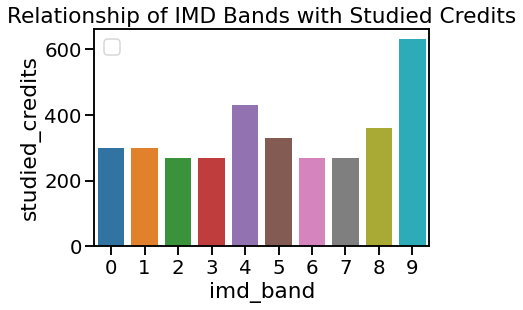

In [248]:
# Plot from the pivot table
sns.barplot(x=student1_credits.index, y=student1_credits['studied_credits'])
plt.legend()
plt.title('Relationship of IMD Bands with Studied Credits')

Students with IMD bands from 0 to 8 has almost the same studied credits except for IMD bands 4, 5 and 8 which have slightly higher studied credits. It is interesting to note that the students with IMD bands of 9 have much higher studied credits.

In [249]:
# Create another dataframe for IMD band of 3
imd_3 = student1[student1['imd_band']==3]
imd_3

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,assess_score_3,assess_score_4,assess_score_5
4,1,2,3,0,0,60,0,1,70,65,62,75,68
9,1,3,3,1,0,60,0,1,67,66,67,65,65
29,1,3,3,0,0,120,0,1,61,59,44,59,44
44,0,1,3,0,0,60,0,1,58,57,64,54,61
45,0,3,3,1,0,60,0,1,81,80,75,72,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12687,0,3,3,1,0,30,0,1,62,56,70,100,100
12706,1,2,3,1,0,30,0,1,76,80,75,100,100
12725,0,3,3,1,0,30,0,1,55,60,70,100,100
12726,0,1,3,1,0,30,0,1,75,85,75,100,100


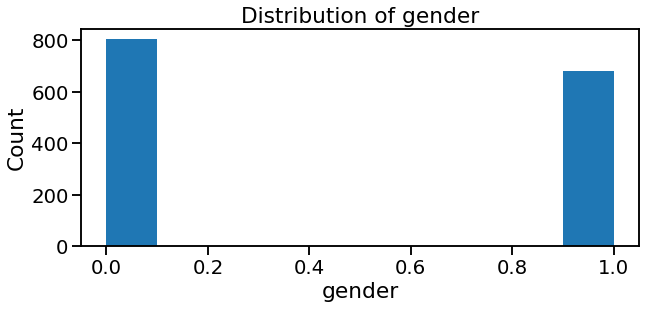

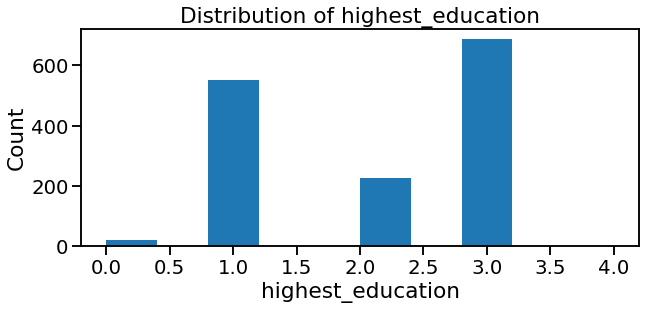

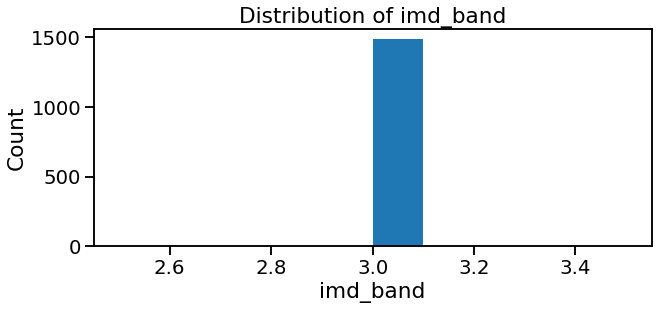

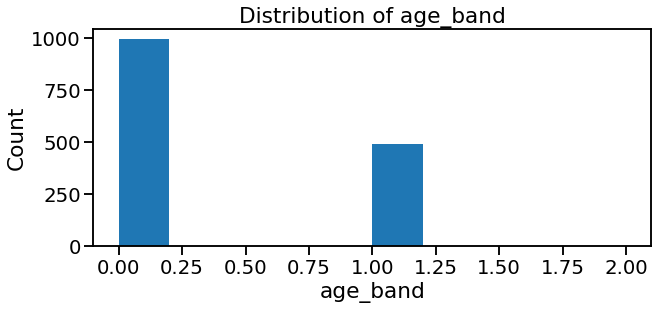

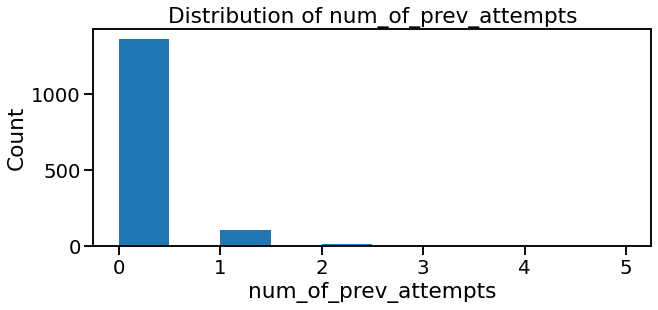

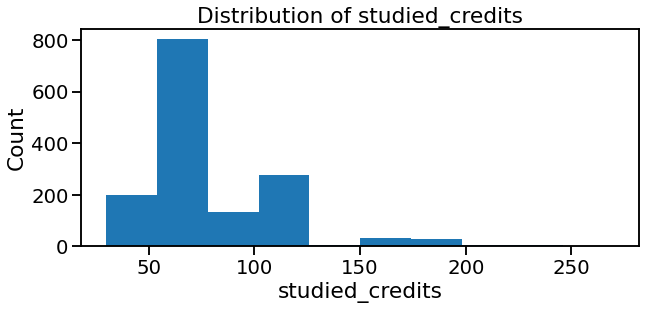

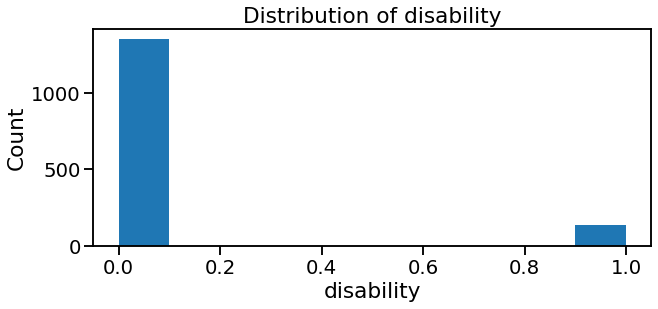

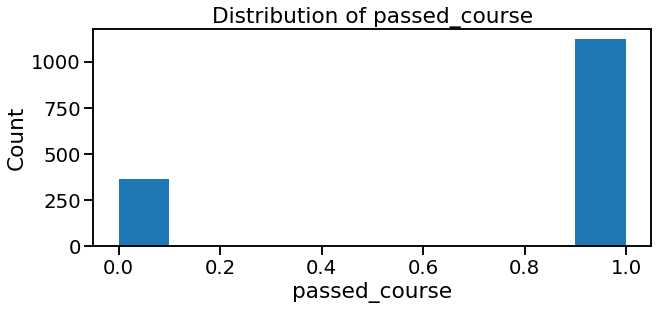

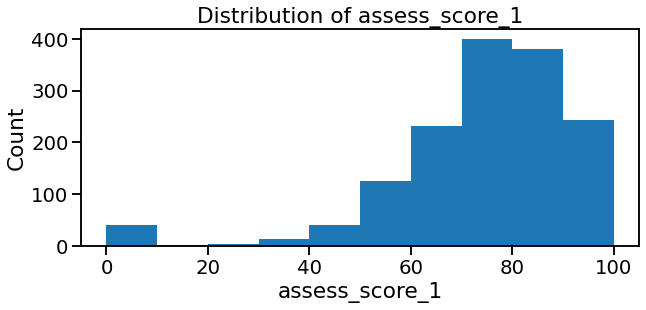

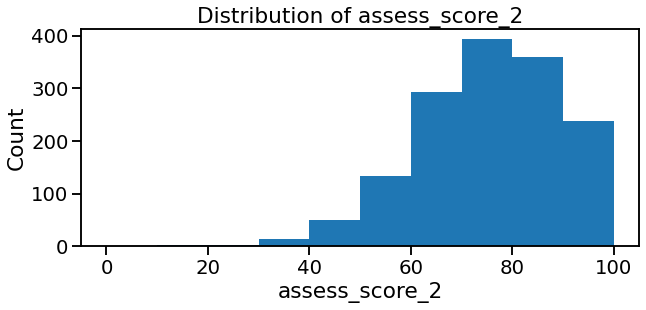

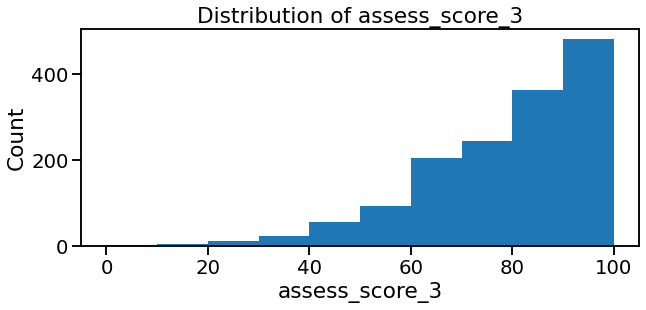

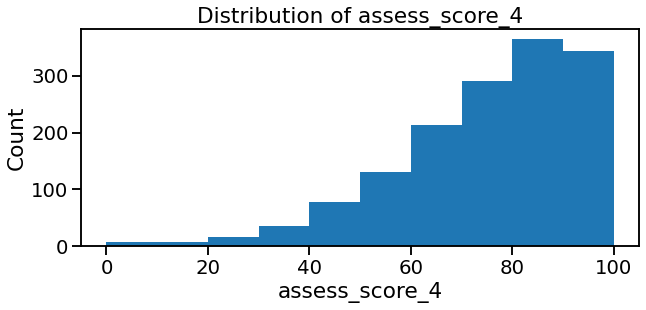

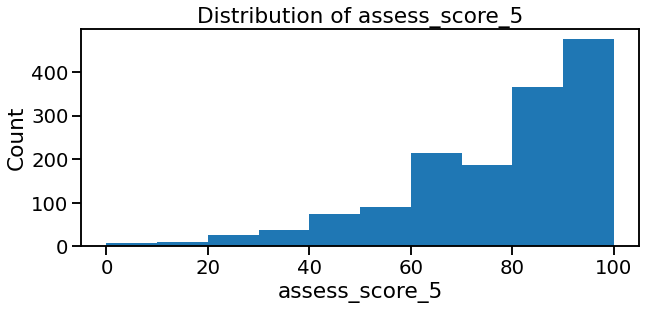

In [250]:
# Data exploration for the new dataframe
for column in imd_3.columns:
  sns.set_context('talk', font_scale=1.2)
  plt.figure(figsize=(10,4))
  plt.hist(imd_3[column])
  plt.xlabel(column)
  plt.ylabel('Count')
  plt.title(f"Distribution of {column}")
  plt.show()

Observations:
1. There are more students with gender 0 for those with IMD band of 3.
2. There are more students with highest educational attainment of 1 and 3 under the IMD band 3
3. There are more students with age band of 0
4. Students with 0 previous of attempts have more IMD bands of 3
5. There are more students without disability for this IMD band
6. More students with IMD band of 3 have passed_course of 1

In [251]:
# Create dataframe with assess_score less than or equal to 20
student1_assess_score = student1[(student1['assess_score_1']<=20) | (student1['assess_score_2']<=20) | (student1['assess_score_3']<=20) | (student1['assess_score_4']<=20) | (student1['assess_score_5']<=20)]
student1_assess_score

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,assess_score_3,assess_score_4,assess_score_5
225,0,1,4,0,0,180,1,0,19,50,38,54,40
337,0,1,4,0,1,60,0,0,67,10,100,56,40
378,0,1,5,1,2,60,0,1,49,54,60,41,0
440,1,1,4,1,1,120,0,0,39,53,100,20,100
484,1,0,3,1,0,60,0,0,61,72,0,40,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12468,0,3,6,0,0,90,0,0,65,75,10,80,80
12471,0,1,3,1,0,60,0,1,91,87,20,100,80
12474,0,1,0,0,0,30,0,1,45,58,45,60,20
12490,0,1,1,0,0,30,0,0,65,35,20,80,80


We can create more filters and pivot tables for this dataframe.

## Feature Engineering and Selection

In [252]:
# Create another column for average assess_score
student1['assess_score_average'] = (student1['assess_score_1'] + student1['assess_score_2'] + student1['assess_score_3'] + student1['assess_score_4'] + student1['assess_score_5']) / 5

# Create another column for thee percentile rank of assessment score average
student1['percentile_rank'] = student1['assess_score_average'].rank(pct=True)
student1

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,assess_score_3,assess_score_4,assess_score_5,assess_score_average,percentile_rank
0,1,2,9,2,0,240,0,1,78,85,80,85,82,82.0,0.622007
1,0,2,2,1,0,60,0,1,70,68,70,64,60,66.4,0.193177
2,0,3,5,1,0,60,0,1,72,71,74,88,75,76.0,0.418387
3,0,1,5,0,0,60,0,1,69,30,63,35,75,54.4,0.059551
4,1,2,3,0,0,60,0,1,70,65,62,75,68,68.0,0.220460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12732,0,1,8,0,0,30,0,1,55,80,55,80,80,70.0,0.259991
12733,0,3,8,0,0,30,1,1,80,85,75,100,100,88.0,0.832849
12734,0,1,4,1,0,30,0,1,80,81,72,100,80,82.6,0.643087
12735,0,3,2,0,0,30,1,1,65,75,70,60,60,66.0,0.186308


It was assumed that the weights of the assess_scores are all equal.

In [253]:
student1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12737 entries, 0 to 12736
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                12737 non-null  int64  
 1   highest_education     12737 non-null  int64  
 2   imd_band              12737 non-null  int64  
 3   age_band              12737 non-null  int64  
 4   num_of_prev_attempts  12737 non-null  int64  
 5   studied_credits       12737 non-null  int64  
 6   disability            12737 non-null  int64  
 7   passed_course         12737 non-null  int64  
 8   assess_score_1        12737 non-null  int64  
 9   assess_score_2        12737 non-null  int64  
 10  assess_score_3        12737 non-null  int64  
 11  assess_score_4        12737 non-null  int64  
 12  assess_score_5        12737 non-null  int64  
 13  assess_score_average  12737 non-null  float64
 14  percentile_rank       12737 non-null  float64
dtypes: float64(2), int6

## Modelling

### Data Preprocessing

In [254]:
# Instantiate Standard Scaler
scaler= StandardScaler()

# Fit the data with the scaler
student1_scaled = scaler.fit_transform(student1)

# Import the model
from sklearn.cluster import KMeans

# Instantiate the model
kmeans = KMeans()

# Make a pipeline for the model
kmeans_pipe = Pipeline(
    steps=(['Standard Scaler', scaler], ['KMeans Clustering', kmeans])
)

### Model Training

In [255]:
# Fit the data with the model
kmeans_pipe.fit(student1_scaled)

# Make predictions
kmeans_predictions = kmeans_pipe.predict(student1_scaled)

No handles with labels found to put in legend.


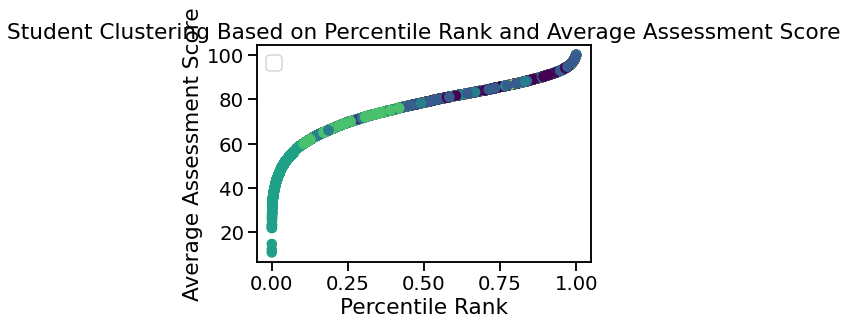

In [256]:
# Make a cluster column
student1['cluster'] = kmeans.labels_

# Scatter plot
plt.scatter(student1['percentile_rank'], student1['assess_score_average'], c=student1['cluster'])
plt.xlabel('Percentile Rank')
plt.ylabel('Average Assessment Score')
plt.title('Student Clustering Based on Percentile Rank and Average Assessment Score')
plt.legend()

### Model Evaluation

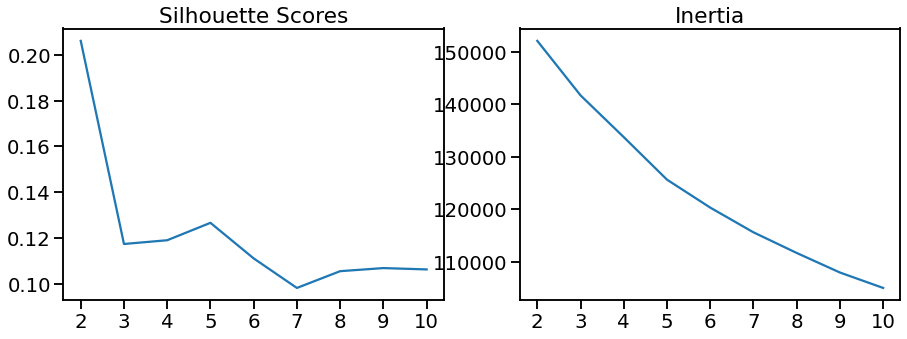

In [257]:
# Iterate over a range of k clusters to find the optimal number of clusters
from sklearn.metrics import silhouette_score
ks = range(2,11)
sils = []
inertias = []
for k in ks:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(student1_scaled)
  sils.append(silhouette_score(student1_scaled, kmeans.labels_))
  inertias.append(kmeans.inertia_)
# plot inertias and silhouette scores for each number of clusters.
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(ks, sils)
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias)
axes[1].set_title('Inertia')
axes[1].set_xticks(ks);

The 2 clusters have the highest sils score but if we would take a look at the inertia, the elbow is at clusters 5. So we will choose 5 clusters.

In [258]:
# Refit KMeans with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(student1_scaled)
# Add the clusters as a column in the dataframe
student1['cluster'] = kmeans.labels_
student1.head()

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,assess_score_3,assess_score_4,assess_score_5,assess_score_average,percentile_rank,cluster
0,1,2,9,2,0,240,0,1,78,85,80,85,82,82.0,0.622007,1
1,0,2,2,1,0,60,0,1,70,68,70,64,60,66.4,0.193177,2
2,0,3,5,1,0,60,0,1,72,71,74,88,75,76.0,0.418387,2
3,0,1,5,0,0,60,0,1,69,30,63,35,75,54.4,0.059551,3
4,1,2,3,0,0,60,0,1,70,65,62,75,68,68.0,0.220460,2


In [259]:
# Group the dataframe by cluster and aggregate by mean values
# Add as_index=False so that the clusters are a column, not the index
cluster_groups = student1.groupby('cluster', as_index=False).mean()
cluster_groups

,cluster,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,assess_score_3,assess_score_4,assess_score_5,assess_score_average,percentile_rank
0,0,0.359676,1.995947,3.944276,0.284701,0.089159,75.592705,1.000000,0.750760,75.319149,75.432624,80.570415,78.562310,80.433637,78.063627,0.515439
1,1,0.495808,2.243160,4.985658,0.412401,0.013019,71.667034,0.000221,0.915269,84.225508,85.607237,90.455207,86.990733,90.089144,87.473566,0.794815
2,2,0.391067,2.017548,4.157475,0.311531,0.000228,70.361212,0.000000,0.797630,71.845716,71.263674,77.912033,74.257065,76.343209,74.324339,0.384875
3,3,0.524020,1.998529,3.955882,0.278922,0.084314,78.534314,0.074020,0.381863,54.667647,59.347549,57.917157,52.918627,53.407843,55.651765,0.087925
4,4,0.382278,1.965823,4.229114,0.296203,1.326582,106.126582,0.039241,0.698734,75.397468,73.441772,83.649367,73.754430,80.193671,77.287342,0.493622


IndexError: ignored

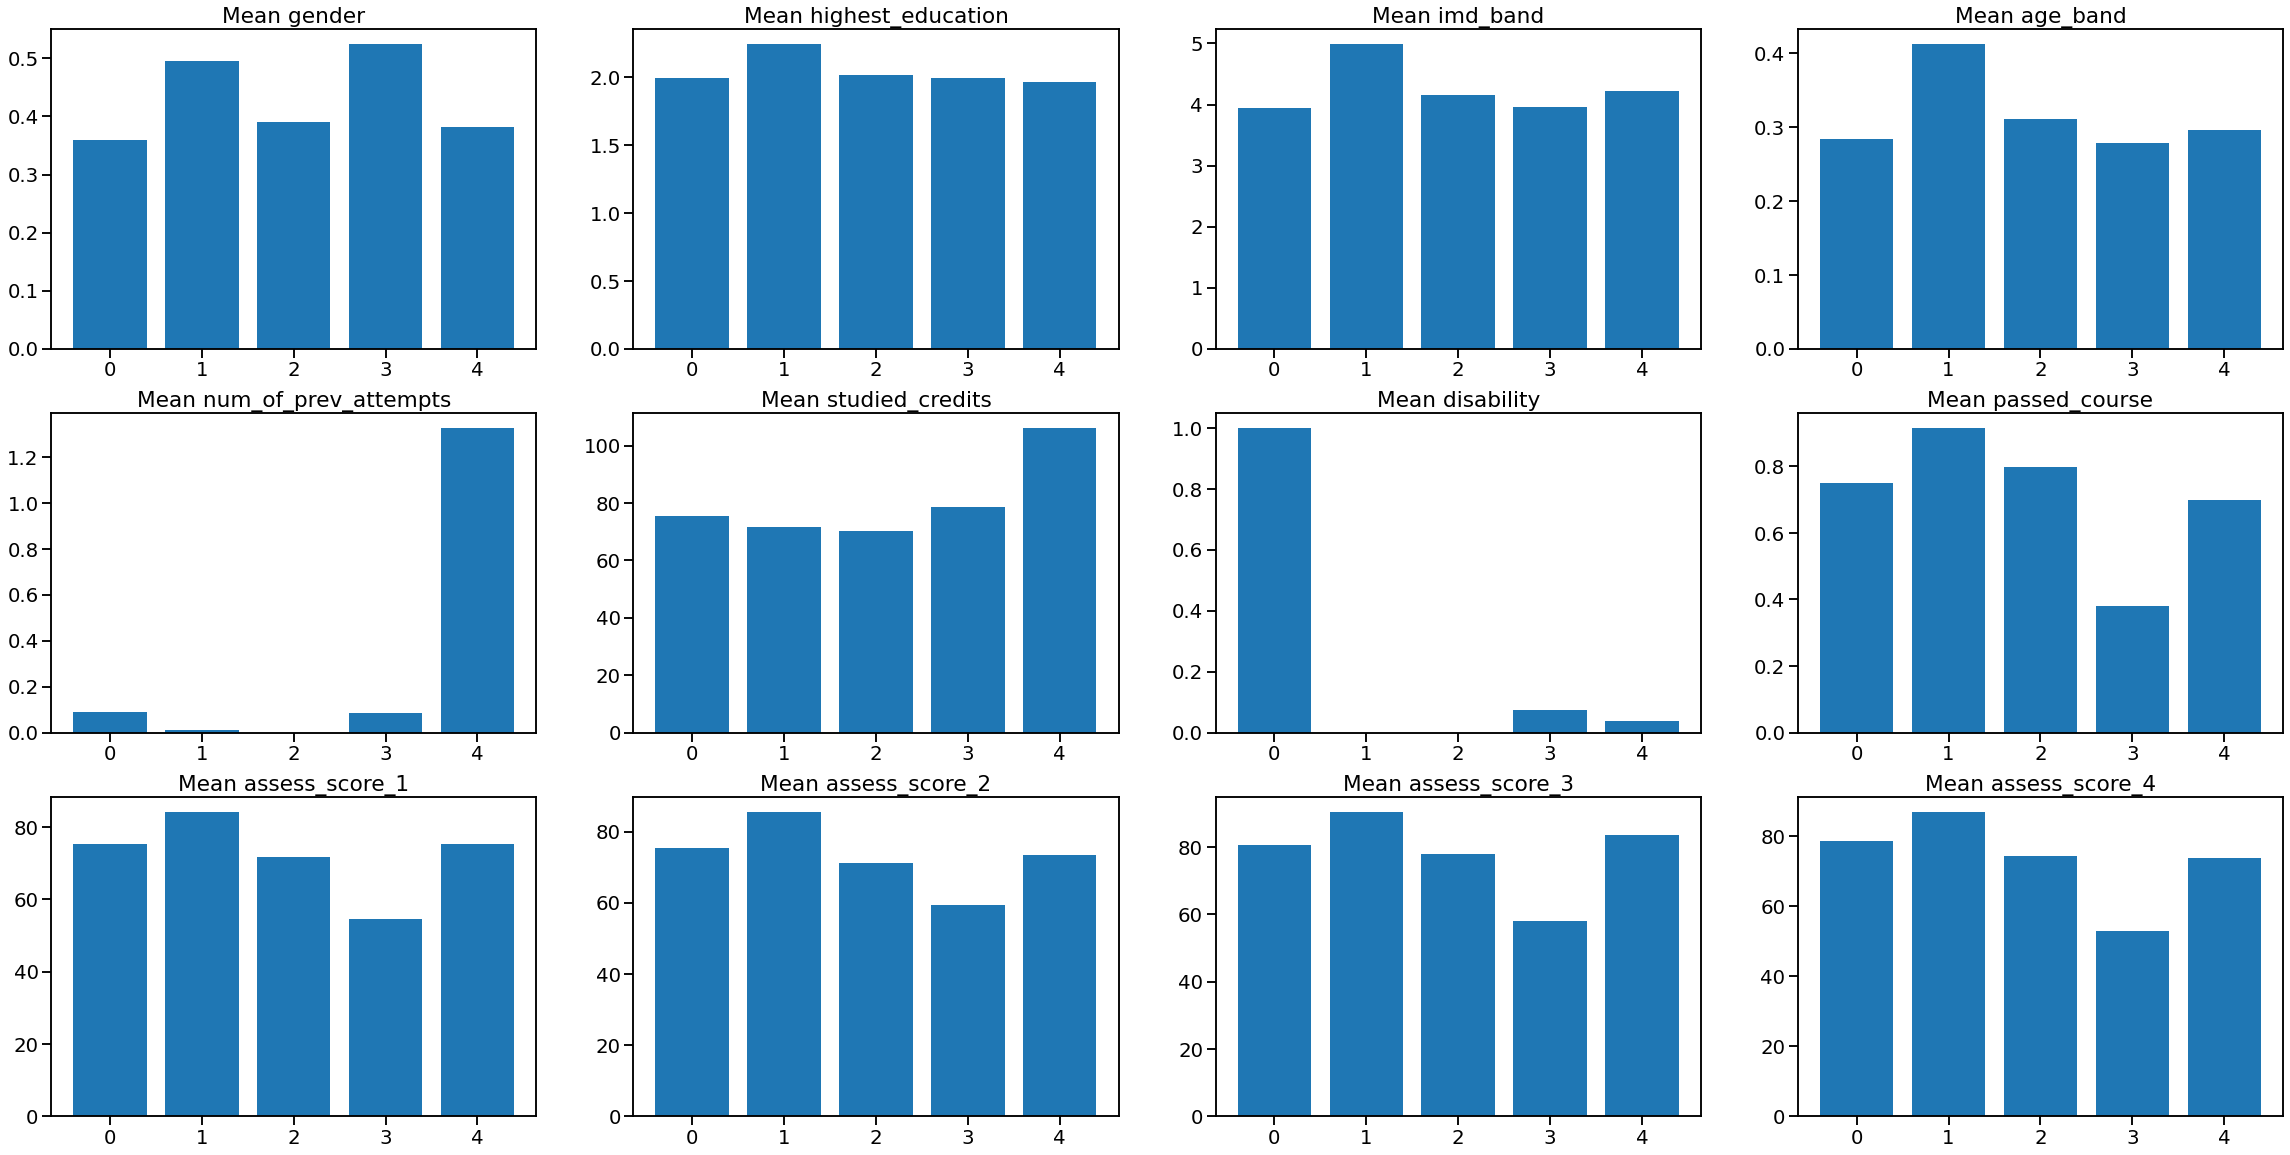

In [260]:
# Visualize means 
fig, axes = plt.subplots(3,4, figsize = (40,20))
# fig is an array of dimensions 3,4.  axes.ravel() will flatten it to 12,1
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')